In [6]:
import numpy as np
import pandas as pd
import keras.backend as K

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input
from sklearn.metrics import accuracy_score, f1_score

from utils import getFilesInDir, create_labels
from rnn_backend import RnnClassifier, preprocess_input_rnn
from utils import one_hot_to_integer
from utils import one_hot
from utils import missclassification_rate
from utils import test_train_split

n_time_steps = 32
n_inputs = 64
fraction = 25


In [7]:
def img_to_tensor(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    tensor = img_to_array(img)
    # print(tensor.shape)
    tensor = np.expand_dims(tensor, axis=0)
    # tensor = preprocess_input(tensor)
    print("Image """ + str(image_path) +
          " "" converted to tensor with shape " + str(tensor.shape))
    return tensor


def getfeatures(folder, target_size, model='Resnet50'):
    model = ResNet50(weights="imagenet", include_top=False)
    images = getFilesInDir(folder)
    images_train, images_test = test_train_split(images, fraction)
    tensors_train = []
    tensors_test = []
    for i, j in images_train.items():
        for k in j:
            tensors_train.append(img_to_tensor(k, target_size=(target_size)))
    for i, j in images_test.items():
        for k in j:
            tensors_test.append(img_to_tensor(k, target_size=(target_size)))
            # print()
    preprocessed_tensors_train = [preprocess_input(i) for i in tensors_train]
    preprocessed_tensors_test = [preprocess_input(i) for i in tensors_test]
    print("Total Training Tensors created:" + str(len(tensors_train)))
    print("Total Testing Tensors created:" + str(len(tensors_test)))
    labels_train = create_labels(images_train, output_classes=21)
    labels_test = create_labels(images_test, output_classes=21)
    print("Total Training Lables created:" + str(len(labels_train)))
    print("Total Testing Lables created:" + str(len(labels_test)))
    features_list_train = []
    features_list_test = []
    features_list_train = [model.predict(x)
                           for x in preprocessed_tensors_train]
    features_list_test = [model.predict(x)
                          for x in preprocessed_tensors_test]
    return (features_list_train, labels_train, features_list_test, labels_test)
    # (1,1,1,2048)


In [8]:
extracted_features_train, labels_train, extracted_features_test, labels_test = getfeatures(
    folder="Dataset", target_size=(224, 224))
print("Number of Images used for Extracted Features :" +
      str(len(extracted_features_train)))

print("Shape of Each Extracted Feature " +
      str(extracted_features_train[0].shape))

x_train = [preprocess_input_rnn(i, n_time_steps, n_inputs)
           for i in extracted_features_train]
y_train = labels_train

x_test = [preprocess_input_rnn(i, n_time_steps, n_inputs)
          for i in extracted_features_test]
y_test = labels_test

Image Dataset/Buildings/buildings48.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings53.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings14.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings34.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings24.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings17.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings73.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings50.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings51.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings88.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings46.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildin

Image Dataset/Parking/parkinglot93.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot85.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot73.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot94.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot65.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot41.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot52.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot27.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot68.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot00.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot17.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot

Image Dataset/River/river11.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river49.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river85.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river96.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river21.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river98.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river79.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river57.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river01.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river39.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river82.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river63.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/River/river86.

Image Dataset/Bridge/overpass99.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass13.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass94.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass85.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass21.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass00.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass50.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass06.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass93.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass46.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass81.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass34.jpg  converted to tensor with sha

Image Dataset/Forest/forest97.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest82.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest84.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest20.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest37.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest74.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest48.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest59.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest83.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest05.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest34.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Forest/forest60.jpg  converted to tensor with shape (1, 224, 224, 3)
Imag

Image Dataset/Intersection/intersection08.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection45.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection61.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection62.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection51.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection68.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection75.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection77.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection98.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection66.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection59.jpg  con

Image Dataset/Sparseresidential/sparseresidential39.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential44.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential12.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential59.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential27.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential24.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential41.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential23.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential84.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Sparseresidential/sparseresidential07.jpg

Image Dataset/Playground/tenniscourt87.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt67.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt55.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt86.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt33.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt27.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt43.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt14.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt81.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt34.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt64.jpg  converted to tensor with shape (1, 2

Image Dataset/Golfcourse/golfcourse38.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse17.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse98.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse69.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse99.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse71.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse15.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse73.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse37.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse21.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Golfcourse/golfcourse40.jpg  converted to tensor with shape (1, 224, 224, 3)

Image Dataset/Port/harbor13.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Port/harbor46.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Port/harbor00.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Port/harbor41.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mediumresidential/mediumresidential21.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mediumresidential/mediumresidential52.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mediumresidential/mediumresidential12.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mediumresidential/mediumresidential95.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mediumresidential/mediumresidential34.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mediumresidential/mediumresidential86.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mediumresidential/mediumresident

Image Dataset/Beach/beach14.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach29.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach28.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach21.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach36.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach02.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach90.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach17.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach05.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach10.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach71.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach32.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach99.

Image Dataset/Denseresidential/denseresidential87.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential70.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential28.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential83.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential61.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential63.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential93.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential68.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential74.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Denseresidential/denseresidential16.jpg  converted to tenso

Image Dataset/Buildings/buildings71.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings10.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings78.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings35.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings75.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings31.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings00.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings86.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings80.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Buildings/buildings06.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/parkinglot23.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Parking/

Image Dataset/Mobilehomepark/mobilehomepark95.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mobilehomepark/mobilehomepark50.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mobilehomepark/mobilehomepark49.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mobilehomepark/mobilehomepark17.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mobilehomepark/mobilehomepark32.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mobilehomepark/mobilehomepark14.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mobilehomepark/mobilehomepark68.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mobilehomepark/mobilehomepark92.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Mobilehomepark/mobilehomepark76.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/overpass52.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Bridge/ove

Image Dataset/Intersection/intersection12.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection47.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection35.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection57.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection99.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection27.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection86.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection05.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection29.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection40.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Intersection/intersection81.jpg  con

Image Dataset/Agricultural/agricultural69.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt17.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt16.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt54.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt56.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt89.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt84.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt50.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt60.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt83.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Playground/tenniscourt78.jpg  converted to tensor with shape (1

Image Dataset/Beach/beach42.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach37.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach45.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach59.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach40.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach85.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach08.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach18.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach00.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach74.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach47.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach48.jpg  converted to tensor with shape (1, 224, 224, 3)
Image Dataset/Beach/beach88.

preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input for rnn
preprocessing input 

In [9]:
r1 = RnnClassifier(input_size=(
    n_time_steps, n_inputs))

# x_train,y_train,

r1.train_model(input_tensors=x_train, output_tensors=y_train)

outputs = [i[0] for i in r1.predict(input_tensors=x_test)]
# print("Predicted Output Labels::" +
# str(r1.predict(input_tensors=x_train)))

# print("\nActual Output Labels::" + str([one_hot_to_integer(i)
# for i in labels]))
# (one_hot_to_integer(labels[167]))
print(outputs)
print([one_hot_to_integer(i) for i in labels_test])
test_acc = missclassification_rate(
    outputs, [one_hot_to_integer(i) for i in labels_test])

Training started

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 21)                2709      
Total params: 101,525
Trainable params: 101,525
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 3.2839 - acc: 0.0047
Epoch 2/50
1500/1500 [==============================] - 1s 838us/step - loss: 3.0188 - acc: 0.1267
Epoch 3/50
1500/1500 [==============================] - 1s 838us/step - loss: 2.8986 - acc: 0.1907
Epoch 4/50
1500/1500 [==============================] - 1s 839us/step - loss: 2.7565 - acc: 0.2720
Epoch 5/50
1500/1500 [==============================] - 1s 839us/step - loss: 2.5542 - acc: 0.3460
Epoch 6/50
1500/

with missclassification score:80
with accuracy score:[0.80952381 0.93617021 1.         0.82608696 0.61111111 0.89795918
 0.90196078 0.94339623 0.75555556 0.96153846 0.79069767 0.97959184
 0.63414634 0.8627451  0.86206897 0.98039216 0.61111111 1.
 0.91666667 0.57575758]


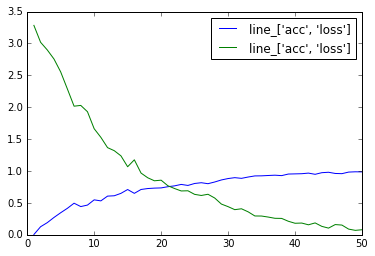

In [18]:
print("with missclassification score:" + str(test_acc))
print("with accuracy score:" + str(f1_score(outputs,
                                      [one_hot_to_integer(i) for i in labels_test], average=None)))

r1.parameterPlot(['acc', 'loss'])


In [16]:
import dill

In [17]:
dill.dump_session('notebook-2000.db')

TypeError: can't pickle SwigPyObject objects